# <center>  Homework2 
### <center> WANG Yuwen sid: 1155201505

#### Q1

(1)

(array([1.694e+03, 1.649e+03, 1.471e+03, 1.633e+03, 1.452e+03, 1.407e+03,
        1.310e+03, 1.269e+03, 1.209e+03, 1.094e+03, 1.083e+03, 1.082e+03,
        9.890e+02, 9.450e+02, 8.710e+02, 8.570e+02, 7.670e+02, 7.200e+02,
        7.020e+02, 6.290e+02, 5.930e+02, 5.530e+02, 5.220e+02, 4.360e+02,
        4.190e+02, 3.700e+02, 3.980e+02, 3.660e+02, 3.600e+02, 2.910e+02,
        2.880e+02, 2.540e+02, 2.350e+02, 2.120e+02, 1.990e+02, 1.710e+02,
        1.580e+02, 1.470e+02, 1.250e+02, 1.210e+02, 9.900e+01, 7.200e+01,
        8.200e+01, 6.800e+01, 6.800e+01, 7.200e+01, 6.300e+01, 4.400e+01,
        4.100e+01, 3.900e+01, 4.900e+01, 3.200e+01, 2.200e+01, 3.100e+01,
        1.900e+01, 1.700e+01, 2.200e+01, 8.000e+00, 1.400e+01, 9.000e+00,
        1.400e+01, 1.300e+01, 5.000e+00, 2.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 3.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

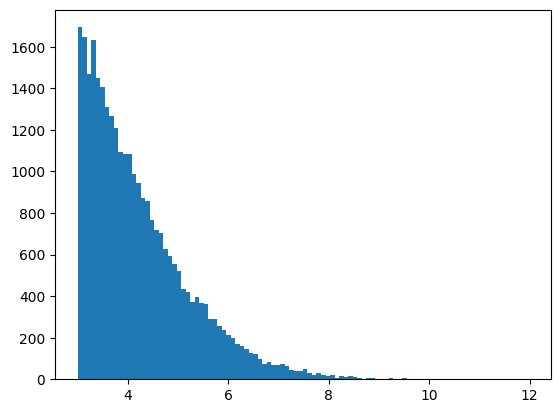

In [1]:
import numpy as np
import scipy
from functools import cache
from pynverse import inversefunc
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
mu=1
c=3
sigma=np.sqrt(5)

def cdf(x):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

def cdf_truc(x):
    return (cdf(x)-cdf(c))/(1-cdf(c))

def transform(u):
    return inversefunc(cdf_truc, u)

sample_size=30000
y =  scipy.stats.uniform.rvs(size=sample_size)  
y=transform(y)     
plt.hist(y, bins=100)

(2)

0.2263


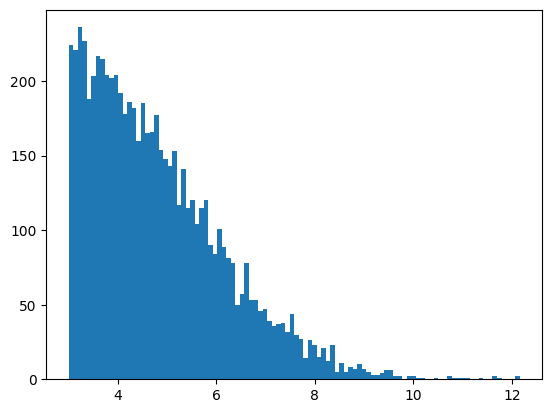

In [2]:
sample_size=30000
alpha=1
M=12
def pdf_f(x):
    if x<c:
        return 0
    else:
        return scipy.stats.norm.pdf(x, loc=c, scale=sigma)/(1-cdf(c))
def g(x):
    return scipy.stats.expon.pdf(x, loc=c, scale=alpha)

y = scipy.stats.expon.rvs(loc=c, scale=alpha, size=sample_size)
u = scipy.stats.uniform.rvs(size=sample_size)
x=[]
for i in range(sample_size):
    if u[i]<pdf_f(y[i])/(M*g(y[i])):
        x.append(y[i])
plt.hist(x, bins=100)
print(len(x)/sample_size)